## Exercise I:
In a previous exercise, we asked “Is the normal distribution a good model for the distribution of ages in the U.S. population?” To answer this question, we plotted the CDF of the data and compared it to the CDF of a normal distribution with the same mean and standard deviation.

Now we’ll compare the estimated density of the data with the normal PDF.

- Again, compute the mean and standard deviation of ages in the GSS dataset.

- Use linspace to create an array of values between 18 and 89.

- Use norm to create a normal distribution with the same mean and standard deviation as the data, then use it to compute the normal PDF for each value in the array.

- Plot the normal PDF with a gray line.

- Use sns.kdeplot to estimate and plot the density of the ages in the GSS.

Note: Seaborn can’t handle NaNs, so use dropna to drop them before calling kdeplot.

How well do the PDF and KDE plots agree?

## Data for Exercise I::   The General Social Survey (Week 12)
The examples in this chapter are based on a new dataset, the General Social Survey (GSS). The GSS has run annually since 1972; it surveys a representative sample of adult residents of the U.S. and asks questions about demographics, personal history, and beliefs about social and political issues.

It is widely used by politicians, policy makers, and researchers. The GSS dataset contains hundreds of columns; using an online tool call GSS Explorer[https://gssdataexplorer.norc.org/]. This week we selected just a few and created a data extract.

Like the NSFG data we used in the previous week, the GSS data is stored in a fixed-width format, described by a Stata data dictionary.

In [2]:
# define files for downloading
dict_file = 'GSS.dct'
data_file = 'GSS.dat.gz'

In [3]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

In [4]:
download('https://github.com/AllenDowney/' +
         'ElementsOfDataScience/raw/master/data/' +
         dict_file)
download('https://github.com/AllenDowney/' +
         'ElementsOfDataScience/raw/master/data/' +
         data_file)

In [5]:
from statadict import parse_stata_dict

stata_dict = parse_stata_dict(dict_file)

In [6]:
import gzip

fp = gzip.open(data_file)

In [7]:
# Create DataFrame
import pandas as pd

gss = pd.read_fwf(fp, 
                  names=stata_dict.names, 
                  colspecs=stata_dict.colspecs)

In [8]:
# ex1 for attendance
gss

,YEAR,ID_,AGE,EDUC,SEX,GUNLAW,GRASS,REALINC
0,1972,1,23,16,2,1,0,18951.0
1,1972,2,70,10,1,1,0,24366.0
2,1972,3,48,12,2,1,0,24366.0
3,1972,4,27,17,2,1,0,30458.0
4,1972,5,61,12,2,1,0,50763.0
...,...,...,...,...,...,...,...,...
64809,2018,2344,37,12,2,2,0,0.0
64810,2018,2345,75,12,2,2,0,14755.0
64811,2018,2346,67,12,2,1,1,45400.0
64812,2018,2347,72,16,1,0,2,24970.0


In [9]:
import numpy as np

age = gss['AGE'].replace([98, 99], np.nan)
age = age.dropna()
mean, std = age.mean(), age.std()

print(mean, std)

46.09935589756294 17.53470306167092


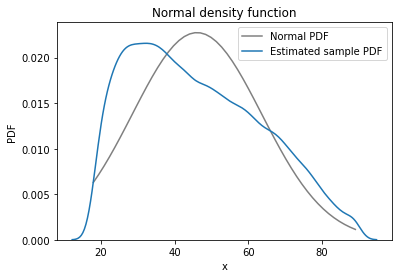

In [10]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Normal PDF
xs = np.linspace(18, 89)
ys = norm(mean, std).pdf(xs)
plt.plot(xs, ys, color='gray', label='Normal PDF')

# KDE 
sns.kdeplot(age, label='Estimated sample PDF')

plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Normal density function')
plt.legend()

### How well do the PDF and KDE plots agree?
KDE plot (PDF plot from a sample) doesn't agree well with Normal PDF.

KDE plot is skewed right because the sample contains many respondents whose age is larger than the average. 

## Exercise II : 

In a previous exercise, we used CDFs to see if the distribution of income fits a lognormal distribution. We can make the same comparison using a PDF and KDE.

- Again, extract REALINC from gss and compute its logarithm using np.log10().

- Compute the mean and standard deviation of the log-transformed incomes.

- Use norm to make a normal distribution with the same mean and standard deviation as the log-transformed incomes.

- Plot the PDF of the normal distribution.

- Use sns.kdeplot() to estimate and plot the density of the log-transformed incomes.

In [37]:
gss

,YEAR,ID_,AGE,EDUC,SEX,GUNLAW,GRASS,REALINC
0,1972,1,23,16,2,1,0,18951.0
1,1972,2,70,10,1,1,0,24366.0
2,1972,3,48,12,2,1,0,24366.0
3,1972,4,27,17,2,1,0,30458.0
4,1972,5,61,12,2,1,0,50763.0
...,...,...,...,...,...,...,...,...
64809,2018,2344,37,12,2,2,0,0.0
64810,2018,2345,75,12,2,2,0,14755.0
64811,2018,2346,67,12,2,1,1,45400.0
64812,2018,2347,72,16,1,0,2,24970.0


In [38]:
# Clean data
import numpy as np

inc = gss['REALINC'].replace(0, np.nan)
inc = inc.dropna()

inc

0        18951.0
1        24366.0
2        24366.0
3        30458.0
4        50763.0
          ...   
64807     4086.0
64808     7377.5
64810    14755.0
64811    45400.0
64812    24970.0
Name: REALINC, Length: 58293, dtype: float64

In [39]:
# Log-transformed
inc_log = np.log10(inc)
inc_log

0        4.277632
1        4.386784
2        4.386784
3        4.483701
4        4.705547
           ...   
64807    3.611298
64808    3.867909
64810    4.168939
64811    4.657056
64812    4.397419
Name: REALINC, Length: 58293, dtype: float64

In [40]:
# Compute mean, std of log-transformed income
mean2, std2 = inc_log.mean(), inc_log.std()

print(mean2, std2)

4.318638044587746 0.44585421099644273


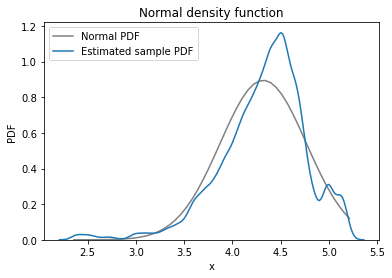

In [41]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Normal PDF
xs = np.linspace(min(inc_log), max(inc_log))
ys = norm(mean2, std2).pdf(xs)
plt.plot(xs, ys, color='gray', label='Normal PDF')

# KDE
sns.kdeplot(inc_log, label='Estimated sample PDF')

plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Normal density function')
plt.legend()